In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d kaustubhb999/tomatoleaf #veri setinin buraya yapıştır
! unzip /content/tomatoleaf.zip

In [3]:
import os
os.chdir('/content/tomato/')
os.listdir()

['val', 'train', '.ipynb_checkpoints']

In [5]:
#kütüphanaleri yüklemem lazım
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras.applications import ResNet152V2, ResNetRS50, VGG16 #feature maps
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense #yapay sinir ağı
from tensorflow.keras.models import Model

In [6]:
#data veri arttırımı
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.3)
train = datagen.flow_from_directory('/content/tomato/train', seed=123, target_size=(256,256), subset='training')
val = datagen.flow_from_directory('/content/tomato/train', seed=123, target_size=(256,256),subset='validation')

# Test dataset for evaluation
datagen2 = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test = datagen2.flow_from_directory('val')

Found 7000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


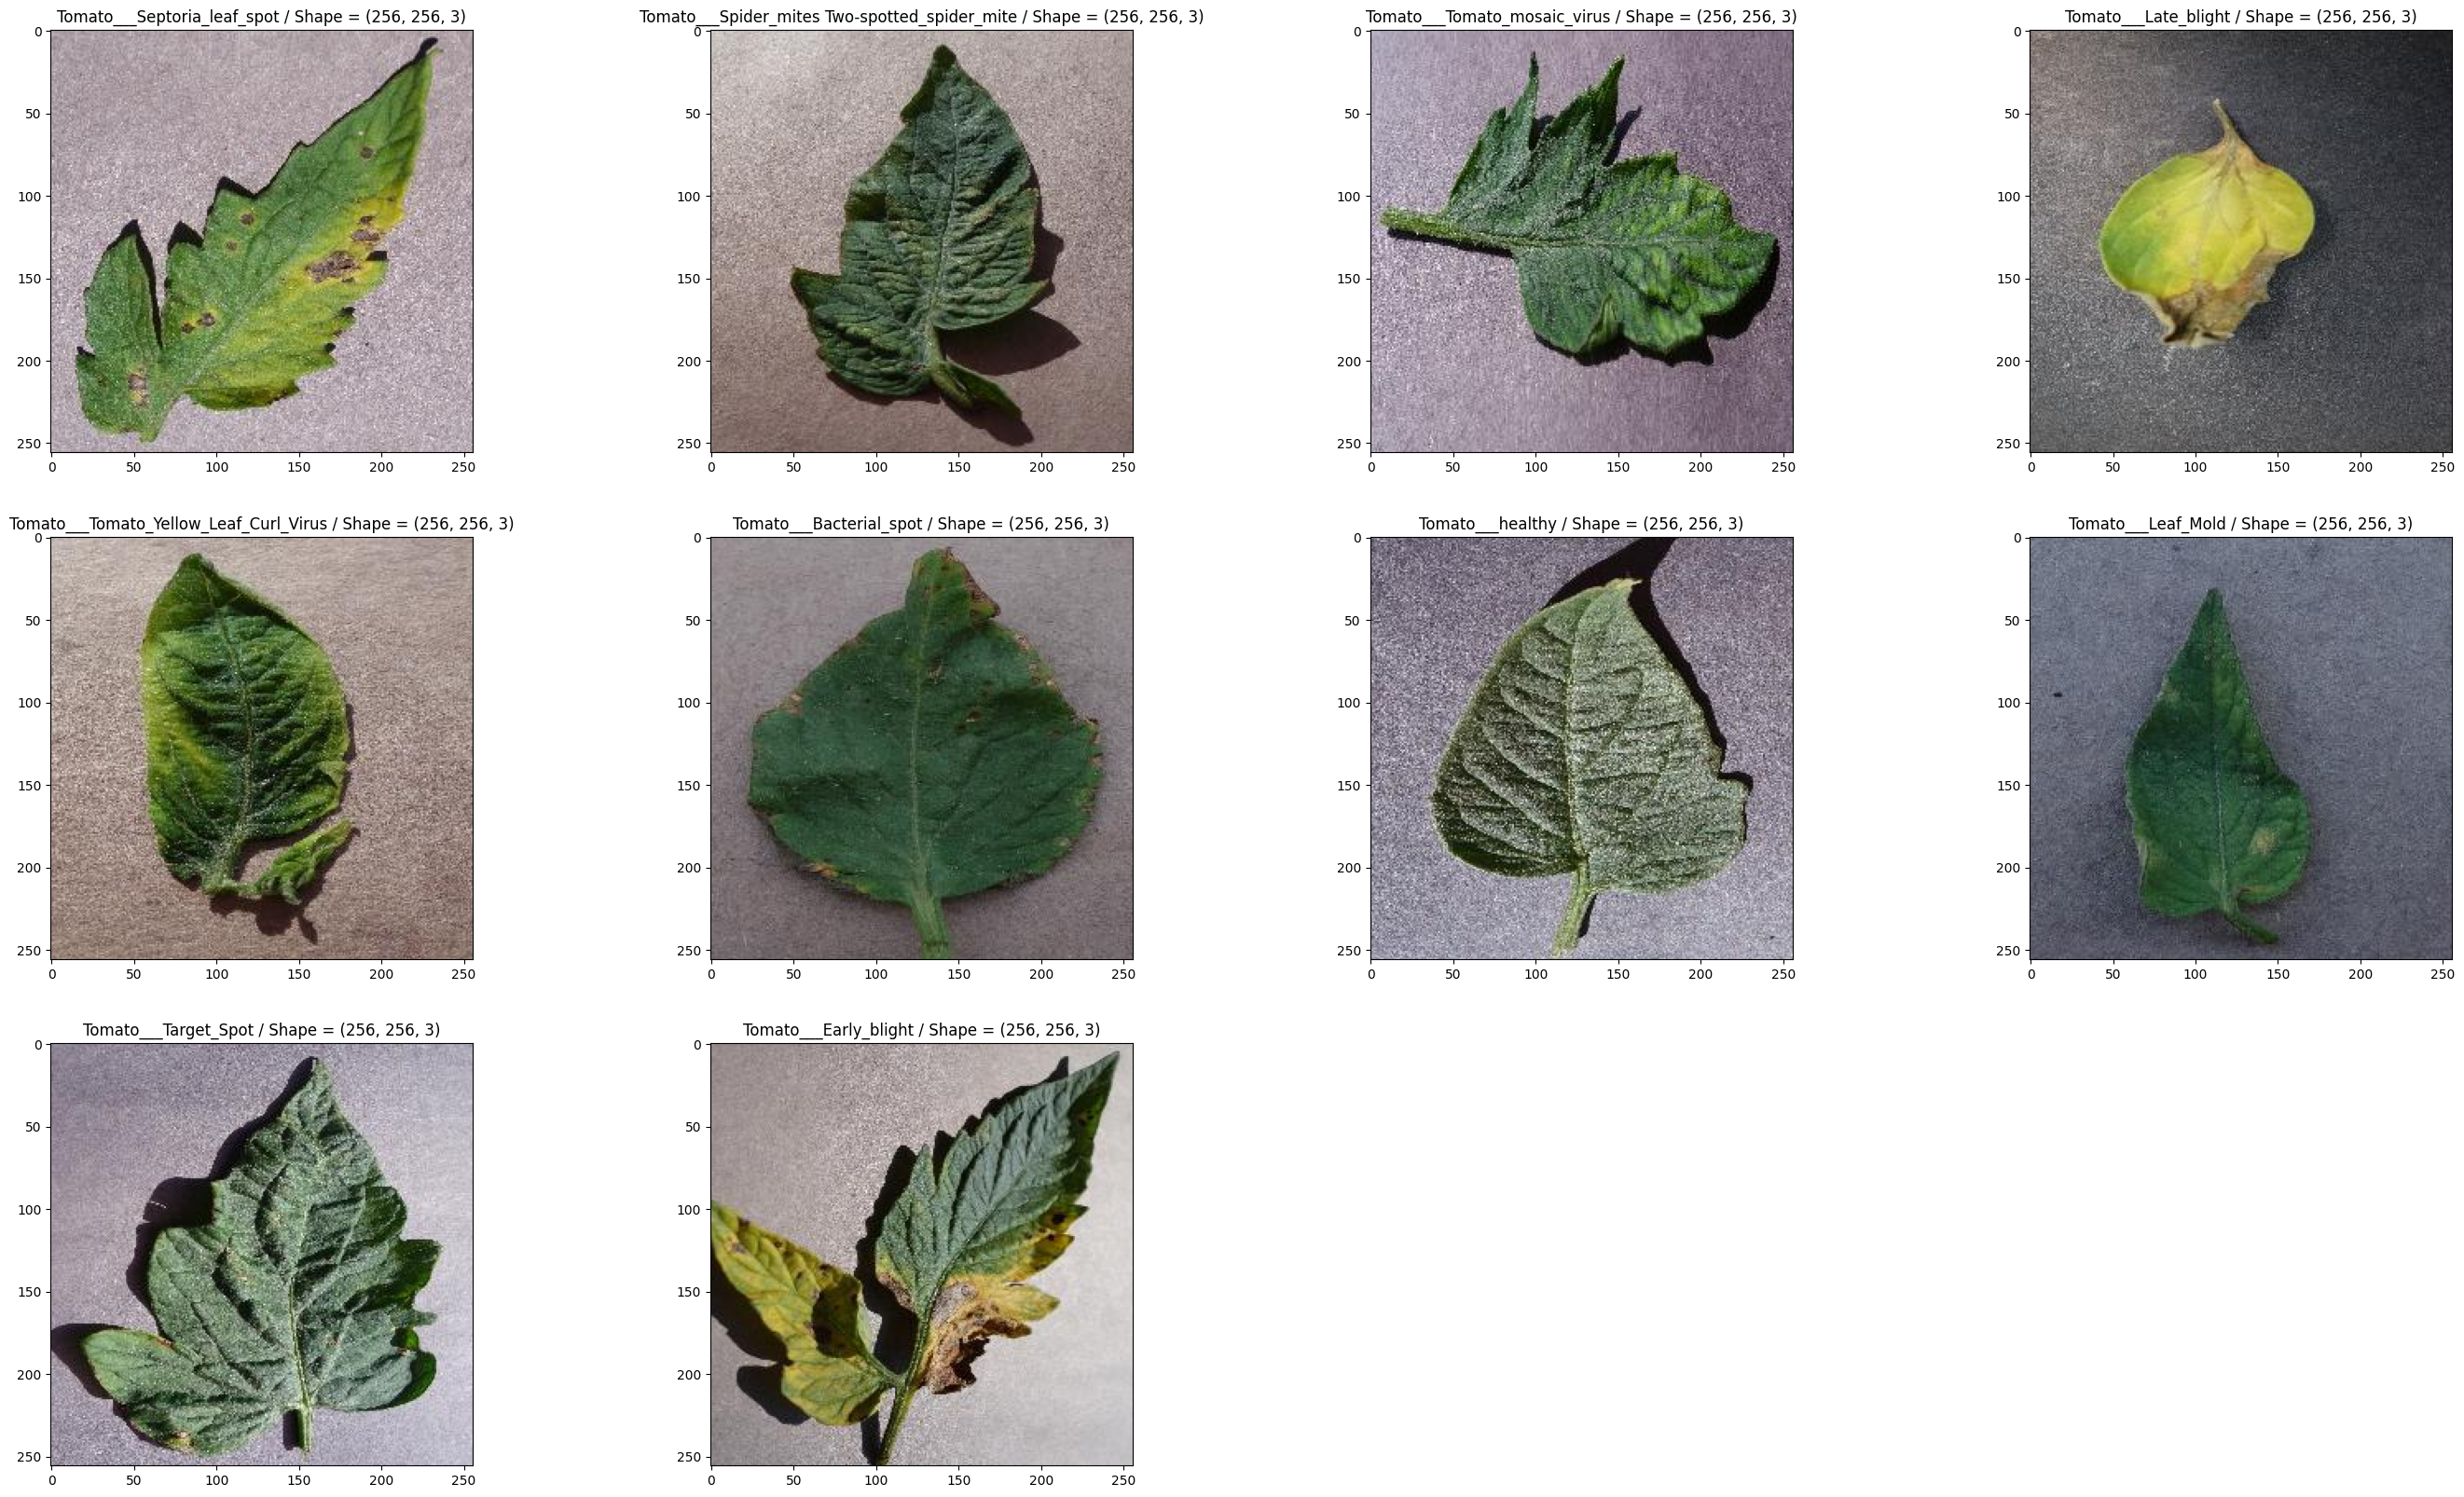

In [9]:
classes = os.listdir('train')

plt.figure(figsize=(35,20))
for i in enumerate(classes):
    pic = os.listdir('train/'+i[1])[0]
    image = Image.open('train/'+i[1]+'/'+pic)
    image = np.asarray(image)
    plt.subplot(3,4,i[0]+1)
    plt.title('{0} / Shape = {1}'.format(i[1], image.shape))
    plt.imshow(image)
plt.show()

In [ ]:
base_model = keras.applications.EfficientNetB7(input_shape=(256,256,3), include_top=False, weights="imagenet")
for layers in base_model.layers[:140]:
      layers.trainable = False
for layers in base_model.layers[140:]:
      layers.trainable = True
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation='relu')(x)
pred = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=pred)
model.summary()

In [ ]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_activations=True,
    show_dtype=True,
    show_layer_names=True,
    show_trainable=True
)

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history=model.fit(train, batch_size=32, epochs=2, validation_data=val)


Epoch 1/2


KeyboardInterrupt: 

In [ ]:
# Evaluate the model on the validation data
evaluation = model.evaluate(test)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

In [ ]:
#ikinci bir örnek

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset #veri setinin buraya yapıştır
! unzip /content/corn-or-maize-leaf-disease-dataset.zip

In [14]:
import pandas as pd
import numpy as np
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dropout,Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense #yapay sinir ağı
from tensorflow.keras.models import Model

In [4]:
file_path='/content/data'

In [5]:
pip install split_folders #Eğer veri setim test, train ve val diye bölünmediyse bölmek için

In [6]:
import splitfolders
splitted_folder='/content/corn-or-maize-leaf-disease-dataset/splitted_folder'
def train_test_valid(train_size=0.6,test_size=0.2,val_size=0.2,images_folder=file_path,splitted_folder=splitted_folder):
  train_size = train_size
  test_size = test_size
  val_size = val_size
  input_folder = images_folder
  output_folder = splitted_folder
  splitfolders.ratio(input_folder,output_folder, seed = 1337, ratio = (train_size,test_size,val_size), group_prefix = None)
train_test_valid()


Copying files: 4188 files [00:00, 5839.52 files/s]


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_file_path = '/content/corn-or-maize-leaf-disease-dataset/splitted_folder/train'
test_file_path =  '/content/corn-or-maize-leaf-disease-dataset/splitted_folder/test'
val_file_path =  '/content/corn-or-maize-leaf-disease-dataset/splitted_folder/val'

def data_pre_processing(valid_split = 0,input_size = (224, 224),image_color = 'rgb',batch_size = 32,shuffle=True):
  train_gen=ImageDataGenerator(rescale=1/255.0,validation_split=valid_split,fill_mode='nearest',rotation_range=40,horizontal_flip=True)
  validation_gen=ImageDataGenerator(rescale=1/255.0,validation_split=valid_split)
  test_gen=ImageDataGenerator(rescale=1/255.0)
  train_data=train_gen.flow_from_directory(directory=train_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')
  test_data=test_gen.flow_from_directory(directory=test_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')
  valid_data=validation_gen.flow_from_directory(directory=val_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')
  return train_data,test_data,valid_data #Bana geri döndüğünde yazdığım bu değerleri çıktı ver

train2,test2,validation2=data_pre_processing()


Found 2511 images belonging to 4 classes.
Found 841 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


In [8]:
os.chdir('/content/corn-or-maize-leaf-disease-dataset/splitted_folder/')
os.listdir()

['val', 'train', 'test']

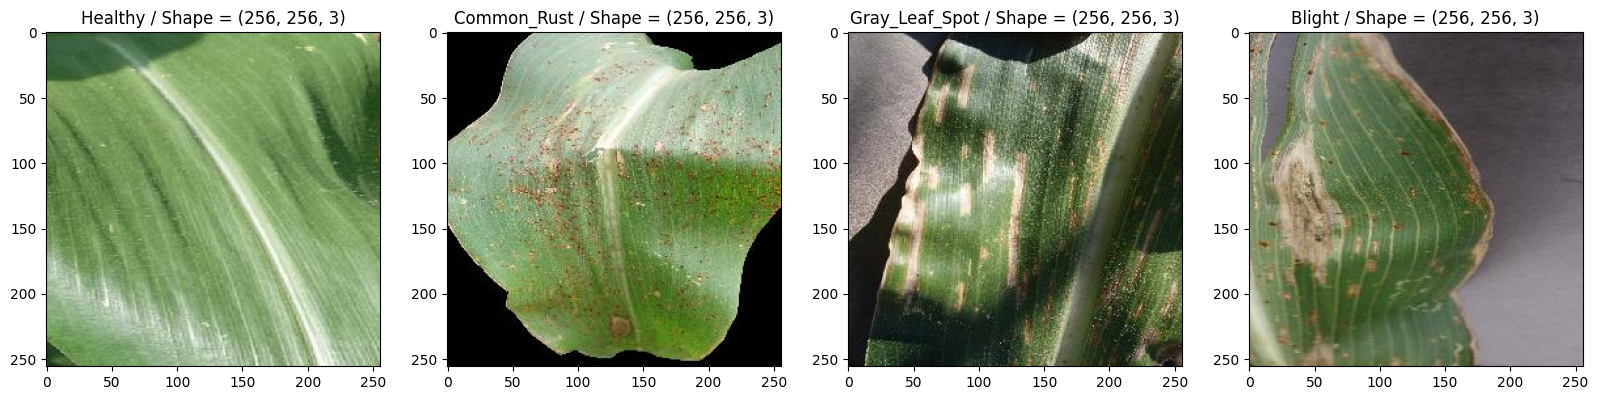

In [10]:
from PIL import Image
classes = os.listdir('train')
plt.figure(figsize=(25,10))
for i in enumerate(classes):
    pic = os.listdir('train/'+i[1])[0]
    image = Image.open('train/'+i[1]+'/'+pic)
    image = np.asarray(image)
    plt.subplot(2,5,i[0]+1)
    plt.title('{0} / Shape = {1}'.format(i[1], image.shape))
    plt.imshow(image)
plt.show()

In [ ]:
base_model = keras.applications.VGG16(input_shape=(224,224,3), include_top=False, weights="imagenet")
for layers in base_model.layers[:140]:
      layers.trainable = False
for layers in base_model.layers[140:]:
      layers.trainable = True
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation='relu')(x)
pred = Dense(4, activation='softmax')(x)
model2 = Model(inputs=base_model.input, outputs=pred)
model2.summary()

In [ ]:
keras.utils.plot_model(
    model2,
    show_shapes=True,
    show_layer_activations=True,
    show_dtype=True,
    show_layer_names=True,
    show_trainable=True
)

In [30]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model2.fit(train2, batch_size=32, epochs=2, validation_data=validation2)

Epoch 1/2
79/79 [==============================] - 46s 562ms/step - loss: 0.6488 - accuracy: 0.7495 - val_loss: 0.4304 - val_accuracy: 0.8337
Epoch 2/2
79/79 [==============================] - 41s 518ms/step - loss: 0.3979 - accuracy: 0.8554 - val_loss: 0.3579 - val_accuracy: 0.8768


In [41]:
# Evaluate the model on the validation data
evaluation = model2.evaluate(test2)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

27/27 [==============================] - 5s 159ms/step - loss: 0.3824 - accuracy: 0.8407
Validation Loss: 0.38240140676498413
Validation Accuracy: 0.840665876865387


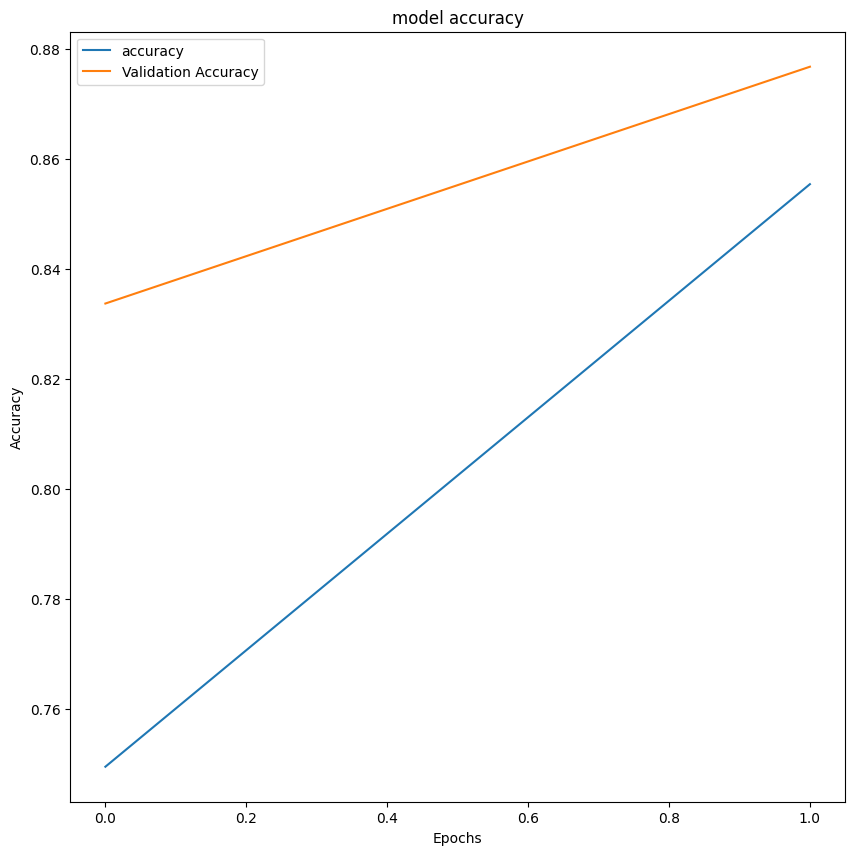

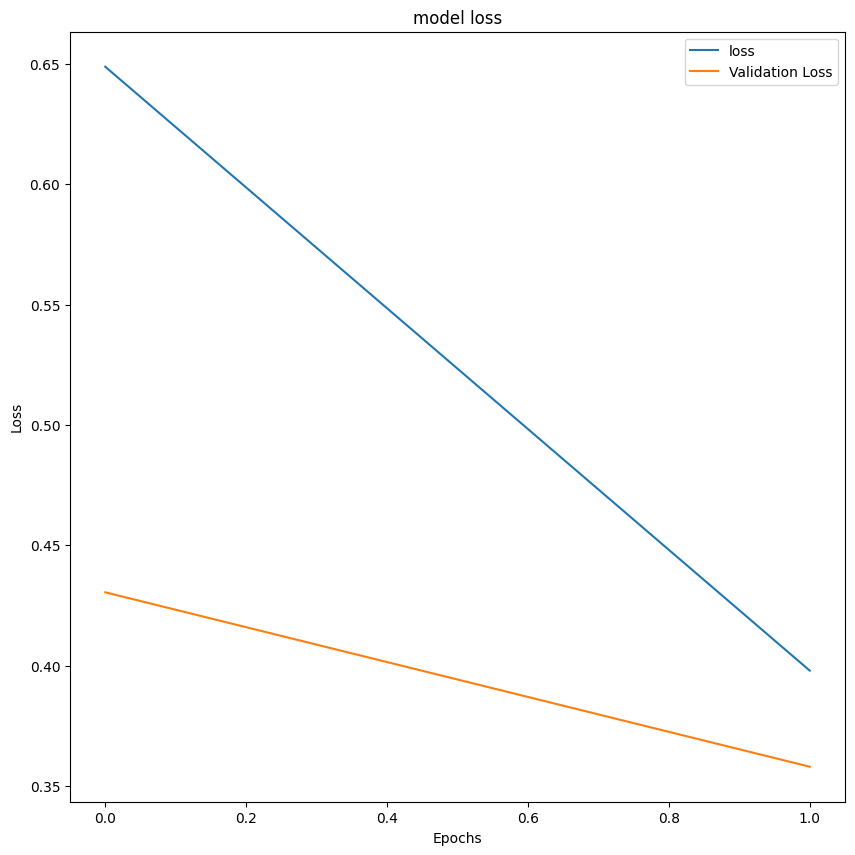

In [31]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["accuracy","Validation Accuracy"])
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["loss","Validation Loss"])
plt.show()

In [32]:
y_real=[]
all_pred=[]
count=0
for x,y in test2:
  predict=model2.predict(x)

  for i in predict:
    all_pred.append(np.argmax(i)+1)
  for i in y:
    i=np.argmax(i)+1
    y_real.append(i)

  if len(y_real)==len(test2.filepaths):
    break

1/1 [==============================] - 3s 3s/step


In [33]:
target_names =[]
for key,value in test2.class_indices.items(): #Mevcut test datamızdaki sınıfların numarısı almış oluruz
  target_names.append(f'condition: {key}')

In [34]:
from sklearn import metrics
report=metrics.classification_report(y_real,all_pred,target_names=target_names)
conf_efficnet2=metrics.confusion_matrix(y_real,all_pred)

In [ ]:
report

'                           precision    recall  f1-score   support\n\n        condition: Blight       0.60      0.80      0.68       212\n   condition: Common_Rust       0.97      0.91      0.94       270\ncondition: Gray_Leaf_Spot       0.85      0.18      0.29       124\n       condition: Healthy       0.84      0.99      0.91       235\n\n                 accuracy                           0.80       841\n                macro avg       0.81      0.72      0.70       841\n             weighted avg       0.82      0.80      0.77       841\n'

In [39]:
import itertools
def plot_confusion_matrix(cnf_matrix, numbers_type='numbers_and_percentage', class_names=target_names, title='Confusion matrix', cmap=plt.cm.Blues, file_name='confusionmatrix.png'):
    combined = True
    cnf_matrix_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    thresh = 0.8*cnf_matrix.max() / 1.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        if numbers_type == 'numbers_and_percentage':
            #st1 = '{:.2f}%'.format(100 * cnf_matrix_normalized[i, j])
            st2 = '{:2d}'.format(cnf_matrix[i, j])
            plt.text(j, i, st2,
                     horizontalalignment="center", verticalalignment='bottom',
                     color="white" if cnf_matrix[i, j] > thresh else "black")

        elif numbers_type == 'percentage':
            fmt = '.2f'
            plt.text(j, i, format(cnf_matrix_normalized[i, j], fmt),
                     horizontalalignment="center", verticalalignment='bottom',
                     color="white" if cnf_matrix[i, j] > thresh else "black")
        else:
            fmt = 'd'
            plt.text(j, i, format(cnf_matrix[i, j], fmt),
                     horizontalalignment="center", verticalalignment='bottom',
                     color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(file_name)

    return

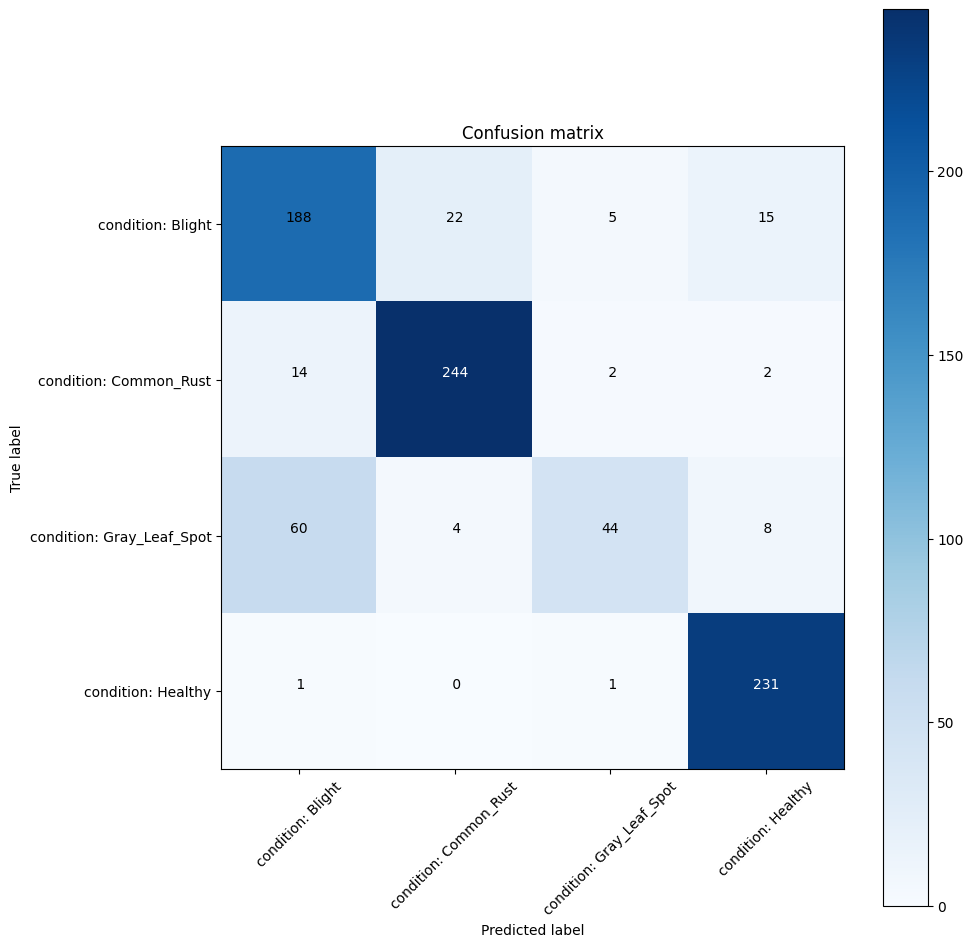

In [40]:
plot_confusion_matrix(conf_efficnet2)